Ваша задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [147]:
df = pd.read_csv('train.csv',',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [148]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


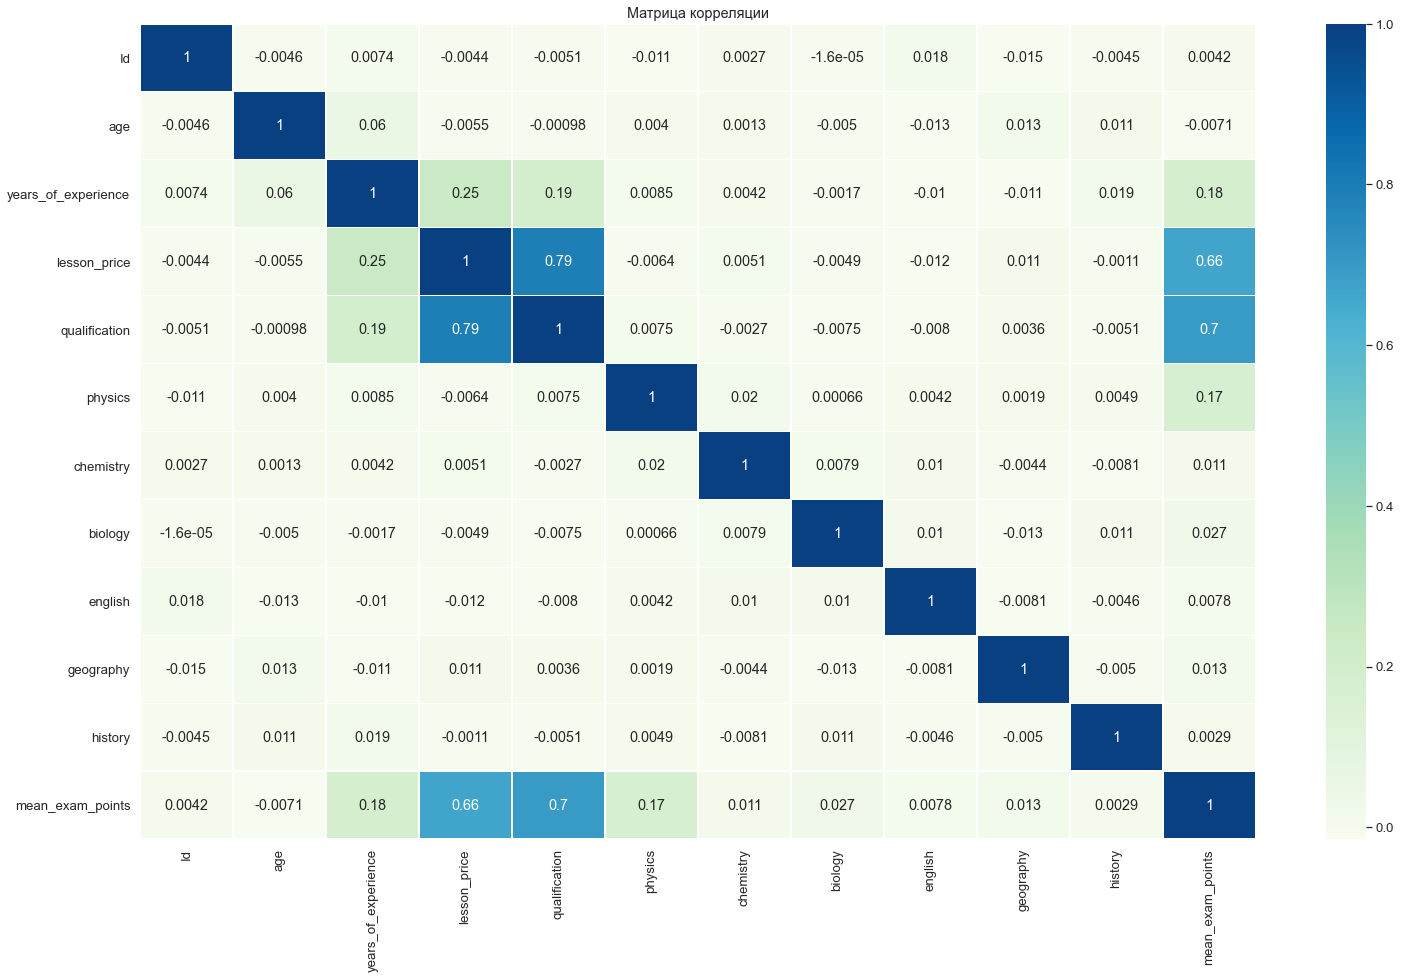

In [149]:
plt.figure(figsize = (25,15))

sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Матрица корреляции')
plt.show()

In [150]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

y = df['mean_exam_points'].values/100
y

array([0.61, 0.76, 0.53, ..., 0.62, 0.56, 0.52])

In [151]:
X = df.loc[:,['years_of_experience', 'lesson_price','qualification','physics']].values
X

array([[0.00e+00, 1.40e+03, 1.00e+00, 1.00e+00],
       [4.00e+00, 2.85e+03, 3.00e+00, 1.00e+00],
       [0.00e+00, 1.20e+03, 1.00e+00, 0.00e+00],
       ...,
       [1.00e+00, 1.25e+03, 1.00e+00, 1.00e+00],
       [3.00e+00, 1.10e+03, 1.00e+00, 0.00e+00],
       [0.00e+00, 1.45e+03, 1.00e+00, 0.00e+00]])

In [152]:
X_st = standard_scale(X)
X_st

array([[-0.54548565,  1.24804665, -0.54420456, -0.54420456],
       [-0.54036127,  3.10563368, -0.54164237, -0.54420456],
       [-0.54548565,  0.99182775, -0.54420456, -0.54548565],
       ...,
       [-0.54420456,  1.05588248, -0.54420456, -0.54420456],
       [-0.54164237,  0.8637183 , -0.54420456, -0.54548565],
       [-0.54548565,  1.31210138, -0.54420456, -0.54548565]])

In [153]:
X_st = X_st.T
X_st

array([[-0.54548565, -0.54036127, -0.54548565, ..., -0.54420456,
        -0.54164237, -0.54548565],
       [ 1.24804665,  3.10563368,  0.99182775, ...,  1.05588248,
         0.8637183 ,  1.31210138],
       [-0.54420456, -0.54164237, -0.54420456, ..., -0.54420456,
        -0.54420456, -0.54420456],
       [-0.54420456, -0.54420456, -0.54548565, ..., -0.54420456,
        -0.54548565, -0.54548565]])

In [154]:
def calc_logloss(y, y_pred):
    for i in range(y_pred.shape[0]):
        if y_pred[i]==1:
            y_pred[i]-=1e-4
        elif y_pred[i]==0:
            y_pred[i]+=1e-4
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [155]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-0.9*z))
    return res

In [156]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [157]:
W = eval_model(X_st, y, iterations=15000, alpha=1)

1500 [-0.03358954  0.77326247  0.13478167  0.99531582] 0.6330212364683654
3000 [-0.04100702  0.77325408  0.14546087  0.99203534] 0.6330211285727803
4500 [-0.04841725  0.77324569  0.1561357   0.98875198] 0.633021020786267
6000 [-0.05582024  0.7732373   0.16680617  0.98546576] 0.6330209131086351
7500 [-0.063216    0.77322891  0.17747229  0.98217668] 0.6330208055396939
9000 [-0.07060453  0.77322053  0.18813406  0.97888474] 0.6330206980792523
10500 [-0.07798584  0.77321214  0.19879148  0.97558994] 0.6330205907271211
12000 [-0.08535994  0.77320376  0.20944456  0.97229229] 0.6330204834831101
13500 [-0.09272683  0.77319537  0.22009329  0.96899179] 0.6330203763470302
15000 [-0.10008653  0.77318699  0.23073769  0.96568844] 0.6330202693186926


In [158]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    return y_pred

In [159]:
y_pred = calc_pred_proba(W,X_st)
y_pred

array([0.58215393, 0.83539117, 0.53798014, ..., 0.54928579, 0.51567493,
       0.5926864 ])

In [160]:
df_kaggle = pd.read_csv('test.csv',',')
df_kaggle.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [161]:
X_kaggle = df_kaggle.loc[:,['years_of_experience', 'lesson_price','qualification','physics']].values
X_kaggle

array([[3.00e+00, 1.05e+03, 1.00e+00, 0.00e+00],
       [3.00e+00, 1.85e+03, 2.00e+00, 0.00e+00],
       [1.00e+00, 1.55e+03, 1.00e+00, 1.00e+00],
       ...,
       [5.00e+00, 1.10e+03, 1.00e+00, 0.00e+00],
       [0.00e+00, 1.75e+03, 2.00e+00, 0.00e+00],
       [5.00e+00, 2.00e+03, 2.00e+00, 1.00e+00]])

In [162]:
X_kaggle_st = X_kaggle.copy()

In [163]:
X_kaggle_st = (X_kaggle_st - X.mean()) / X.std()

In [164]:
X_kaggle_st = X_kaggle_st.T
X_kaggle_st

array([[-0.54164237, -0.54164237, -0.54420456, ..., -0.53908018,
        -0.54548565, -0.53908018],
       [ 0.79966358,  1.82453918,  1.44021083, ...,  0.8637183 ,
         1.69642973,  2.01670335],
       [-0.54420456, -0.54292346, -0.54420456, ..., -0.54420456,
        -0.54292346, -0.54292346],
       [-0.54548565, -0.54548565, -0.54420456, ..., -0.54548565,
        -0.54548565, -0.54420456]])

In [165]:
kaggle_prediction = calc_pred_proba(W,X_kaggle_st)
kaggle_prediction

array([0.50453653, 0.67515432, 0.61425351, ..., 0.51561728, 0.65538386,
       0.70395327])

In [166]:
df_kaggle['mean_exam_points'] = kaggle_prediction * 100
df_kaggle.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,50.453653
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,67.515432
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,61.425351
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,84.139855
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.895722


In [167]:
df_kaggle.drop("age", axis=1, inplace=True)
df_kaggle.drop("years_of_experience", axis=1, inplace=True)
df_kaggle.drop("lesson_price", axis=1, inplace=True)
df_kaggle.drop("qualification", axis=1, inplace=True)
df_kaggle.drop("physics", axis=1, inplace=True)
df_kaggle.drop("chemistry", axis=1, inplace=True)
df_kaggle.drop("biology", axis=1, inplace=True)
df_kaggle.drop("english", axis=1, inplace=True)
df_kaggle.drop("geography", axis=1, inplace=True)
df_kaggle.drop("history", axis=1, inplace=True)
df_kaggle.head()

,Id,mean_exam_points
0,10000,50.453653
1,10001,67.515432
2,10002,61.425351
3,10003,84.139855
4,10004,86.895722


In [168]:
df_kaggle.to_csv('zalutskii.csv',index=False)